In [1]:
import numpy as np
import pandas as pd


In [2]:
cust_demographics_df=pd.read_csv('cust_demographics.csv')
cust_demographics_df

CUST_ID  gender DateOfBirth State       Contact   Segment
0     21868593  Female   12-Jan-79    VT  789-916-8172  Platinum
1     75740424  Female   13-Jan-70    ME  265-543-1264    Silver
2     30308357  Female   11-Mar-84    TN  798-631-4758    Silver
3     47830476  Female   01-May-86    MA  413-187-7945    Silver
4     19269962    Male   13-May-77    NV  956-871-8691      Gold
...        ...     ...         ...   ...           ...       ...
1080  79539873  Female   15-Mar-81    ND  459-425-4319  Platinum
1081  42364152  Female   07-Jul-96    ID  529-462-1635    Silver
1082  19888166    Male   11-Apr-90    WI  712-651-9613      Gold
1083  11256802  Female   22-Oct-64    LA  469-345-5617    Silver
1084  61575264    Male   12-Jul-95    WY  182-385-1392      Gold

[1085 rows x 6 columns]

In [3]:
claims_df=pd.read_csv('claims.csv')
claims_df

claim_id  customer_id      incident_cause  claim_date claim_area  \
0     54004764     21868593        Driver error  11/27/2017       Auto   
1     33985796     75740424               Crime  10/03/2018       Home   
2     53522022     30308357  Other driver error  02/02/2018       Auto   
3     13015401     47830476      Natural causes  06/17/2018       Auto   
4     22890252     19269962               Crime  01/13/2018       Auto   
...        ...          ...                 ...         ...        ...   
1095  97727122     35951012  Other driver error  06/11/2017       Auto   
1096  10247193     14818669      Natural causes  03/14/2018       Auto   
1097  79807493     85322831  Other driver error  02/09/2018       Auto   
1098  69299345     73449366        Other causes  03/21/2018       Auto   
1099  58809728     43020876  Other driver error  06/04/2017       Auto   

     police_report           claim_type claim_amount  total_policy_claims  \
0               No        Material only        $2980                  1.0   
1          Unknown        Material only        $2980                  3.0   
2               No        Material only      $3369.5                  1.0   
3               No        Material only        $1680                  1.0   
4               No        Material only        $2680                  1.0   
...            ...                  ...          ...                  ...   
1095            No        Material only        $3059                  4.0   
1096            No        Material only        $1520                  2.0   
1097            No  Material and injury       $23575                  2.0   
1098       Unknown  Material and injury       $25120                  1.0   
1099           Yes  Material and injury       $36685                  3.0   

     fraudulent  
0            No  
1            No  
2           Yes  
3            No  
4            No  
...         ...  
1095        Yes  
1096         No  
1097        Yes  
1098         No  
1099        Yes  

[1100 rows x 10 columns]

In [8]:
#1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

combined_df = pd.merge(claims_df, cust_demographics_df, left_on='customer_id', right_on='CUST_ID', how='left')

combined_df

claim_id  customer_id      incident_cause  claim_date claim_area  \
0     54004764     21868593        Driver error  11/27/2017       Auto   
1     33985796     75740424               Crime  10/03/2018       Home   
2     53522022     30308357  Other driver error  02/02/2018       Auto   
3     13015401     47830476      Natural causes  06/17/2018       Auto   
4     22890252     19269962               Crime  01/13/2018       Auto   
...        ...          ...                 ...         ...        ...   
1095  97727122     35951012  Other driver error  06/11/2017       Auto   
1096  10247193     14818669      Natural causes  03/14/2018       Auto   
1097  79807493     85322831  Other driver error  02/09/2018       Auto   
1098  69299345     73449366        Other causes  03/21/2018       Auto   
1099  58809728     43020876  Other driver error  06/04/2017       Auto   

     police_report           claim_type claim_amount  total_policy_claims  \
0               No        Material only        $2980                  1.0   
1          Unknown        Material only        $2980                  3.0   
2               No        Material only      $3369.5                  1.0   
3               No        Material only        $1680                  1.0   
4               No        Material only        $2680                  1.0   
...            ...                  ...          ...                  ...   
1095            No        Material only        $3059                  4.0   
1096            No        Material only        $1520                  2.0   
1097            No  Material and injury       $23575                  2.0   
1098       Unknown  Material and injury       $25120                  1.0   
1099           Yes  Material and injury       $36685                  3.0   

     fraudulent     CUST_ID  gender DateOfBirth State       Contact   Segment  
0            No  21868593.0  Female   12-Jan-79    VT  789-916-8172  Platinum  
1            No  75740424.0  Female   13-Jan-70    ME  265-543-1264    Silver  
2           Yes  30308357.0  Female   11-Mar-84    TN  798-631-4758    Silver  
3            No  47830476.0  Female   01-May-86    MA  413-187-7945    Silver  
4            No  19269962.0    Male   13-May-77    NV  956-871-8691      Gold  
...         ...         ...     ...         ...   ...           ...       ...  
1095        Yes         NaN     NaN         NaN   NaN           NaN       NaN  
1096         No         NaN     NaN         NaN   NaN           NaN       NaN  
1097        Yes         NaN     NaN         NaN   NaN           NaN       NaN  
1098         No         NaN     NaN         NaN   NaN           NaN       NaN  
1099        Yes         NaN     NaN         NaN   NaN           NaN       NaN  

[1100 rows x 16 columns]

In [5]:
#2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

print(combined_df.dtypes)

for column in combined_df.columns:
    unique_values = combined_df[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values[:5]}")



claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object
Column: claim_id, Unique Values: [54004764 33985796 53522022 13015401 22890252]
Column: customer_id, Unique Values: [21868593 75740424 30308357 47830476 19269962]
Column: incident_cause, Unique Values: ['Driver error' 'Crime' 'Other driver error' 'Natural causes'
 'Other causes']
Column: claim_date, Unique Values: ['11/27/2017' '10/03/2018' '02/02/2018' '06/17/2018' '01/13/2018']
Column: claim_area, Unique Values: ['Auto' 'Home']
Column: police_report, Unique Values: ['No' 'Unknown' 'Y

In [6]:
#3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

combined_df['claim_amount'] = combined_df['claim_amount'].str.replace('$', '').astype(float)

print(combined_df['claim_amount'].head())


0    2980.0
1    2980.0
2    3369.5
3    1680.0
4    2680.0
Name: claim_amount, dtype: float64


In [7]:
combined_df

claim_id  customer_id      incident_cause  claim_date claim_area  \
0     54004764     21868593        Driver error  11/27/2017       Auto   
1     33985796     75740424               Crime  10/03/2018       Home   
2     53522022     30308357  Other driver error  02/02/2018       Auto   
3     13015401     47830476      Natural causes  06/17/2018       Auto   
4     22890252     19269962               Crime  01/13/2018       Auto   
...        ...          ...                 ...         ...        ...   
1095  97727122     35951012  Other driver error  06/11/2017       Auto   
1096  10247193     14818669      Natural causes  03/14/2018       Auto   
1097  79807493     85322831  Other driver error  02/09/2018       Auto   
1098  69299345     73449366        Other causes  03/21/2018       Auto   
1099  58809728     43020876  Other driver error  06/04/2017       Auto   

     police_report           claim_type  claim_amount  total_policy_claims  \
0               No        Material only        2980.0                  1.0   
1          Unknown        Material only        2980.0                  3.0   
2               No        Material only        3369.5                  1.0   
3               No        Material only        1680.0                  1.0   
4               No        Material only        2680.0                  1.0   
...            ...                  ...           ...                  ...   
1095            No        Material only        3059.0                  4.0   
1096            No        Material only        1520.0                  2.0   
1097            No  Material and injury       23575.0                  2.0   
1098       Unknown  Material and injury       25120.0                  1.0   
1099           Yes  Material and injury       36685.0                  3.0   

     fraudulent     CUST_ID  gender DateOfBirth State       Contact   Segment  
0            No  21868593.0  Female   12-Jan-79    VT  789-916-8172  Platinum  
1            No  75740424.0  Female   13-Jan-70    ME  265-543-1264    Silver  
2           Yes  30308357.0  Female   11-Mar-84    TN  798-631-4758    Silver  
3            No  47830476.0  Female   01-May-86    MA  413-187-7945    Silver  
4            No  19269962.0    Male   13-May-77    NV  956-871-8691      Gold  
...         ...         ...     ...         ...   ...           ...       ...  
1095        Yes         NaN     NaN         NaN   NaN           NaN       NaN  
1096         No         NaN     NaN         NaN   NaN           NaN       NaN  
1097        Yes         NaN     NaN         NaN   NaN           NaN       NaN  
1098         No         NaN     NaN         NaN   NaN           NaN       NaN  
1099        Yes         NaN     NaN         NaN   NaN           NaN       NaN  

[1100 rows x 16 columns]

In [9]:
#4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims

combined_df['unreported_injury_claim'] = (combined_df['claim_type'] == 'Material and injury') & (combined_df['police_report'] == 'No')

combined_df['unreported_injury_claim'] = combined_df['unreported_injury_claim'].astype(int)

print(combined_df[['claim_type', 'police_report', 'unreported_injury_claim']].head())


      claim_type police_report  unreported_injury_claim
0  Material only            No                        0
1  Material only       Unknown                        0
2  Material only            No                        0
3  Material only            No                        0
4  Material only            No                        0


In [12]:
#5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique.

# Sorting the combined DataFrame by customer ID and claim date in descending order to keep the most recent observation
combined_df_sorted = combined_df.sort_values(by=['customer_id', 'claim_date'], ascending=[True, False])

# Dropping duplicated records based on the customer ID column and keeping the first occurrence (most recent observation)
combined_df_unique = combined_df_sorted.drop_duplicates(subset='customer_id', keep='first')

# Displaying the first few rows of the DataFrame after removing duplicates
print(combined_df_unique.head())



     claim_id  customer_id      incident_cause  claim_date claim_area  \
184  69348631       154557        Driver error  04/10/2018       Auto   
836  40953049       263204        Other causes  04/04/2018       Auto   
677  45780237       287476      Natural causes  10/17/2017       Auto   
828  89833962       441097        Other causes  03/21/2018       Auto   
505  35782742       524545  Other driver error  07/27/2018       Auto   

    police_report           claim_type claim_amount  total_policy_claims  \
184            No          Injury only          NaN                  1.0   
836            No  Material and injury       $39192                  1.0   
677       Unknown        Material only      $1621.5                  2.0   
828           Yes  Material and injury       $37040                  1.0   
505            No          Injury only       $35250                  3.0   

    fraudulent   CUST_ID  gender DateOfBirth State       Contact   Segment  \
184        Yes  154557.0  

In [15]:
#6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
combined_df_unique_copy = combined_df_unique.copy()

# Impute missing values with mean for continuous variables and mode for categorical variables
for column in combined_df_unique.columns:
    if combined_df_unique_copy[column].dtype == 'object':
        combined_df_unique_copy.loc[:, column].fillna(combined_df_unique_copy[column].mode()[0], inplace=True)
    else:
        combined_df_unique_copy.loc[:, column].fillna(combined_df_unique_copy[column].mean(), inplace=True)

# Check again for missing values after imputation
missing_values_after = combined_df_unique_copy.isna().sum()
print("\nMissing values after imputation:")
print(missing_values_after)



Missing values after imputation:
claim_id                   0
customer_id                0
incident_cause             0
claim_date                 0
claim_area                 0
police_report              0
claim_type                 0
claim_amount               0
total_policy_claims        0
fraudulent                 0
CUST_ID                    0
gender                     0
DateOfBirth                0
State                      0
Contact                    0
Segment                    0
unreported_injury_claim    0
dtype: int64


In [16]:
#7

from datetime import datetime

# Convert 'DateOfBirth' column to datetime format
combined_df_unique_copy['DateOfBirth'] = pd.to_datetime(combined_df_unique_copy['DateOfBirth'])

# Calculate the age of customers in years
current_year = datetime.now().year
combined_df_unique_copy['age'] = current_year - combined_df_unique_copy['DateOfBirth'].dt.year

# Categorize customers based on age
def categorize_age(age):
    if age < 18:
        return 'Children'
    elif 18 <= age <= 30:
        return 'Youth'
    elif 30 < age <= 60:
        return 'Adult'
    else:
        return 'Senior'

combined_df_unique_copy['age_category'] = combined_df_unique_copy['age'].apply(categorize_age)

# Display the first few rows to verify the results
print(combined_df_unique_copy[['DateOfBirth', 'age', 'age_category']].head())


    DateOfBirth  age age_category
184  1978-05-23   46        Adult
836  2072-12-20  -48     Children
677  1988-07-28   36        Adult
828  2071-08-19  -47     Children
505  1980-08-10   44        Adult


C:\Users\91954\AppData\Local\Temp\ipykernel_6060\625658176.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df_unique_copy['DateOfBirth'] = pd.to_datetime(combined_df_unique_copy['DateOfBirth'])


In [18]:
# 8. What is the average amount claimed by the customers from various segments?

# Clean up the 'claim_amount' column and convert it to numeric
combined_df_unique_copy['claim_amount'] = combined_df_unique_copy['claim_amount'].str.replace('$', '').str.replace(',', '').astype(float)

# Group the data by 'Segment' and calculate the average claim amount for each segment
average_claim_amount = combined_df_unique_copy.groupby('Segment')['claim_amount'].mean()

# Display the average claim amount for each segment
print("Average amount claimed by customers from various segments:")
print(average_claim_amount)



Average amount claimed by customers from various segments:
Segment
Gold        12088.957254
Platinum    11919.921053
Silver      11388.066474
Name: claim_amount, dtype: float64


In [19]:
#9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

from datetime import datetime, timedelta

# Convert 'claim_date' column to datetime format
combined_df_unique_copy['claim_date'] = pd.to_datetime(combined_df_unique_copy['claim_date'])

# Calculate the date 20 days prior to 1st of October, 2018
twenty_days_prior = datetime(2018, 10, 1) - timedelta(days=20)

# Filter the DataFrame to select claims that have a claim date before the calculated date
filtered_claims = combined_df_unique_copy[combined_df_unique_copy['claim_date'] < twenty_days_prior]

# Group the filtered data by 'incident_cause' and calculate the total claim amount for each incident cause
total_claim_amount_by_cause = filtered_claims.groupby('incident_cause')['claim_amount'].sum()

# Display the total claim amount based on incident cause
print("Total claim amount based on incident cause for claims before 20 days prior to 1st of October, 2018:")
print(total_claim_amount_by_cause)


Total claim amount based on incident cause for claims before 20 days prior to 1st of October, 2018:
incident_cause
Crime                  672732.0
Driver error          3177590.0
Natural causes        1217691.5
Other causes          3574439.0
Other driver error    3240118.0
Name: claim_amount, dtype: float64


In [20]:
#10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

# Define the states of interest
states_of_interest = ['TX', 'DE', 'AK']

# Define the incident cause of interest
incident_cause_of_interest = 'Driver error'

# Filter the DataFrame to select rows with states of interest and driver-related incident cause
filtered_claims = combined_df_unique_copy[(combined_df_unique_copy['State'].isin(states_of_interest)) & 
                                          (combined_df_unique_copy['incident_cause'] == incident_cause_of_interest)]

# Further filter the DataFrame to select rows where age category is 'Adult'
filtered_claims_adult = filtered_claims[filtered_claims['age_category'] == 'Adult']

# Count the number of rows in the filtered DataFrame
num_adult_claims = len(filtered_claims_adult)

# Display the result
print("Number of adults from TX, DE, and AK claiming insurance for driver-related issues and causes:", num_adult_claims)


Number of adults from TX, DE, and AK claiming insurance for driver-related issues and causes: 10


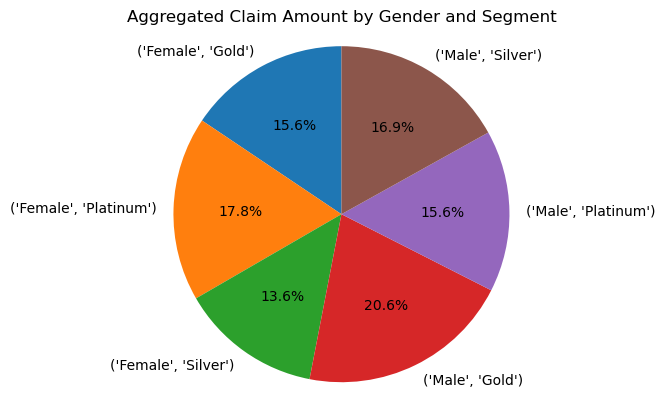

In [21]:
#11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage onthe pie chart.

import matplotlib.pyplot as plt

# Group the data by 'gender' and 'Segment' and calculate the total claim amount
grouped_data = combined_df_unique_copy.groupby(['gender', 'Segment'])['claim_amount'].sum()

# Plotting the pie chart
fig, ax = plt.subplots()
ax.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding a title
plt.title('Aggregated Claim Amount by Gender and Segment')

# Display the pie chart
plt.show()


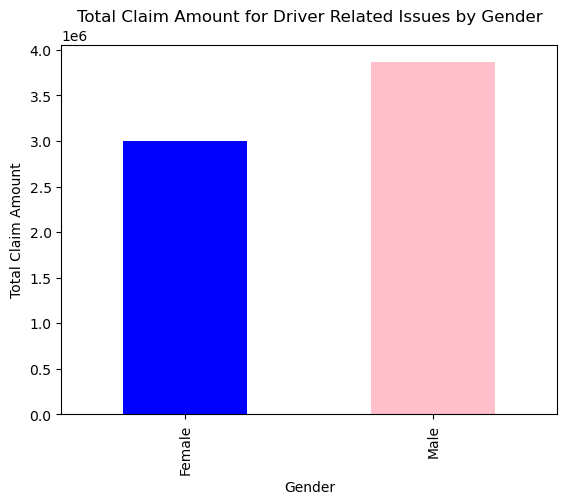

Gender with the most claims for driver-related issues: Male


In [23]:
#12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

import matplotlib.pyplot as plt

# Filter the DataFrame to select rows with incident causes related to driver issues
driver_related_claims = combined_df_unique_copy[combined_df_unique_copy['incident_cause'].str.contains('Driver', case=False)]

# Group the filtered data by gender and calculate the total claim amount for each gender
gender_claim_amount = driver_related_claims.groupby('gender')['claim_amount'].sum()

# Plotting the bar chart
fig, ax = plt.subplots()
gender_claim_amount.plot(kind='bar', ax=ax, color=['blue', 'pink'])

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Total Claim Amount')
plt.title('Total Claim Amount for Driver Related Issues by Gender')

# Display the bar chart
plt.show()

# Determine which gender had claimed the most for driver-related issues
most_claimed_gender = gender_claim_amount.idxmax()
print("Gender with the most claims for driver-related issues:", most_claimed_gender)


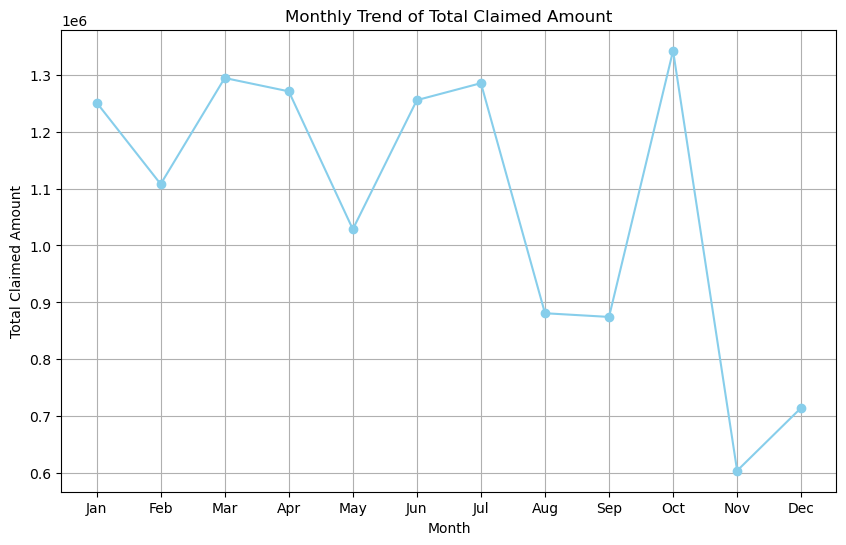

In [27]:
#14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

import pandas as pd
import matplotlib.pyplot as plt

# Convert 'claim_date' to datetime
combined_df_unique_copy['claim_date'] = pd.to_datetime(combined_df_unique_copy['claim_date'])

# Extract month from 'claim_date'
combined_df_unique_copy['claim_month'] = combined_df_unique_copy['claim_date'].dt.month

# Group data by month and calculate total claimed amount
monthly_claim_amount = combined_df_unique_copy.groupby('claim_month')['claim_amount'].sum()

# Plotting the monthly trend
plt.figure(figsize=(10, 6))
monthly_claim_amount.plot(kind='line', marker='o', color='skyblue')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Claimed Amount')
plt.title('Monthly Trend of Total Claimed Amount')

# Formatting x-axis ticks to display month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_claim_amount.index, labels=months)

# Display the plot
plt.grid(True)
plt.show()


C:\Users\91954\AppData\Local\Temp\ipykernel_6060\3262122161.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_data, x='gender', y='claim_amount', hue='age_category', palette='muted', ci=None)


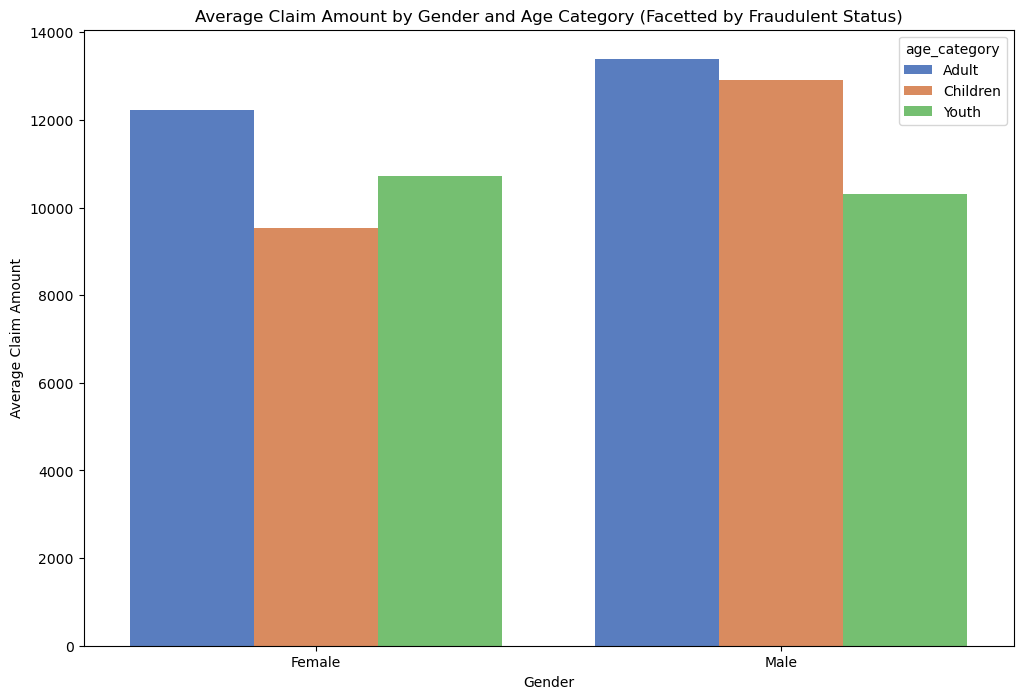

In [29]:
#15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims

import seaborn as sns
import matplotlib.pyplot as plt

# Group data by gender, age category, and fraudulent status
grouped_data = combined_df_unique_copy.groupby(['gender', 'age_category', 'fraudulent'])['claim_amount'].mean().reset_index()

# Plotting facetted bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='gender', y='claim_amount', hue='age_category', palette='muted', ci=None)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Average Claim Amount')
plt.title('Average Claim Amount by Gender and Age Category (Facetted by Fraudulent Status)')

# Display the plot
plt.show()


16. Is there any similarity in the amount claimed by males and females?
Parameters considered: We'll compare the mean claim amounts for males and females.

Hypothesis testing steps:

Null Hypothesis (H0): There is no difference in the mean claim amounts between males and females.
Alternative Hypothesis (H1): There is a difference in the mean claim amounts between males and females.
We'll conduct an independent samples t-test to compare the means.
We'll calculate the p-value and set a significance level (e.g., α = 0.05).
Conclusion from p-values and business implications:

If the p-value is less than α, we reject the null hypothesis, suggesting there is a significant difference in the mean claim amounts between males and females.
Business implications: This could inform insurance companies about potential gender-based differences in claim amounts, which may impact premium pricing or risk assessment.

17. Is there any relationship between age category and segment?
Parameters considered: We'll analyze the distribution of segments across different age categories.

Exploratory analysis:

We'll create a contingency table or heatmap to visualize the relationship between age categories and segments.
We'll calculate chi-square test statistics to determine if there is a significant association between the two categorical variables.
Conclusion from statistical tests and business implications:

If the chi-square test yields a significant p-value, it indicates that age category and segment are not independent, suggesting there is a relationship between them.
Business implications: This insight can help insurers tailor their offerings or marketing strategies based on different age groups.

18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.
Parameters considered: We'll compare the mean claim amounts for the current year with the 2016-17 fiscal year.

Hypothesis testing steps:

Null Hypothesis (H0): There is no difference in the mean claim amounts between the current year and 2016-17 fiscal year.
Alternative Hypothesis (H1): There is a difference in the mean claim amounts between the two periods.
We'll conduct a paired samples t-test to compare the means.
We'll calculate the p-value and set a significance level (e.g., α = 0.05).
Conclusion from p-values and business implications:

If the p-value is less than α, we reject the null hypothesis, suggesting a significant difference in mean claim amounts between the two periods.
Business implications: This information can guide insurers in adjusting their financial planning or risk assessment strategies.

19.Is there any difference between age groups and insurance claims?
Parameters considered: We'll analyze the distribution of insurance claims across different age groups.

Exploratory analysis:

We'll visualize the distribution of insurance claims for each age group using histograms or boxplots.
We can also conduct ANOVA or Kruskal-Wallis tests to determine if there are significant differences in claim amounts among age groups.
Conclusion from statistical tests and business implications:

If ANOVA or Kruskal-Wallis tests yield significant p-values, it indicates that there are differences in claim amounts among age groups.
Business implications: Insurers can use this information to customize insurance products or services based on the specific needs or behaviors of different age groups.

20.Is there any relationship between the total number of policy claims and the claimed amount?
Parameters considered: We'll analyze the correlation between the total number of policy claims and the claimed amount.

Exploratory analysis:

We'll calculate the correlation coefficient between the two variables.
We'll visualize the relationship using a scatter plot.
Conclusion from correlation analysis and business implications:

If the correlation coefficient is significantly different from zero, it indicates a relationship between the total number of policy claims and the claimed amount.
Business implications: Understanding this relationship can help insurers forecast claim amounts based on the volume of policy claims, which can inform budgeting or resource allocation decisions.
By following these steps and conducting appropriate statistical tests, we can derive meaningful insights and make informed decisions for the insurance business.

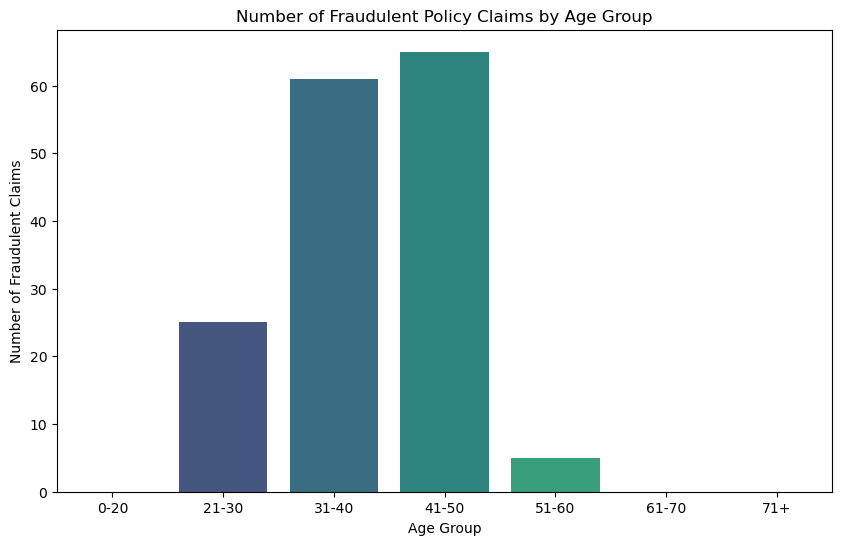

In [38]:
#13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

import pandas as pd
import datetime

# Assuming 'combined_df' contains the relevant information
# Convert 'DateOfBirth' to datetime
combined_df['DateOfBirth'] = pd.to_datetime(combined_df['DateOfBirth'])

# Calculate current year
current_year = datetime.datetime.now().year

# Calculate age
combined_df['Age'] = current_year - combined_df['DateOfBirth'].dt.year

# Define age groups
bins = [0, 20, 30, 40, 50, 60, 70, 120]  # Define age bins
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']  # Define labels for age groups
combined_df['AgeGroup'] = pd.cut(combined_df['Age'], bins=bins, labels=labels, right=False)

# Filter fraudulent claims
fraudulent_claims = combined_df[combined_df['fraudulent'] == 'Yes']

# Group the data by age group and count the number of fraudulent claims in each group
fraudulent_claims_by_age = fraudulent_claims.groupby('AgeGroup').size().reset_index(name='Count')

# Visualize the results using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=fraudulent_claims_by_age, x='AgeGroup', y='Count', palette='viridis')
plt.title('Number of Fraudulent Policy Claims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Fraudulent Claims')
plt.show()
